<a href="https://colab.research.google.com/github/Ankushsaini90/Bike-sharing-demand/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [133]:
!pip install klib

In [134]:
# Importing some library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import klib
import warnings
warnings.filterwarnings("ignore")

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
# Importing the dataset
data = pd.read_csv('/content/SeoulBikeData (1).csv',encoding= 'unicode_escape')

##Exploratory data analysis

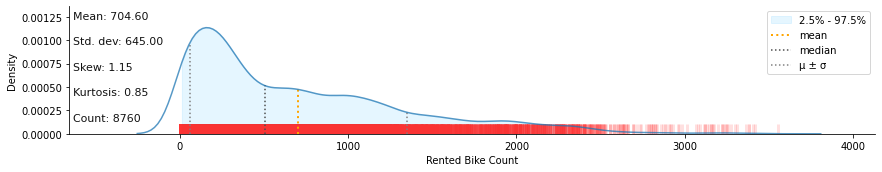

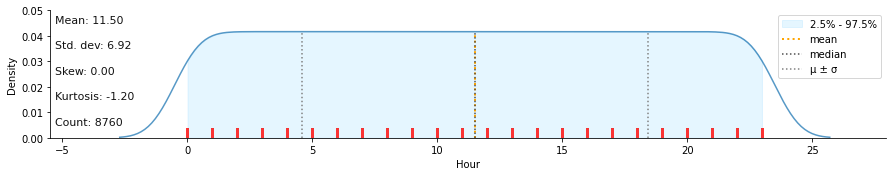

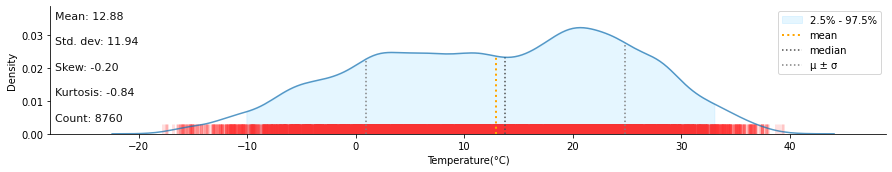

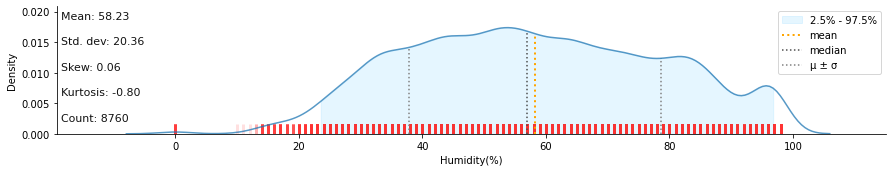

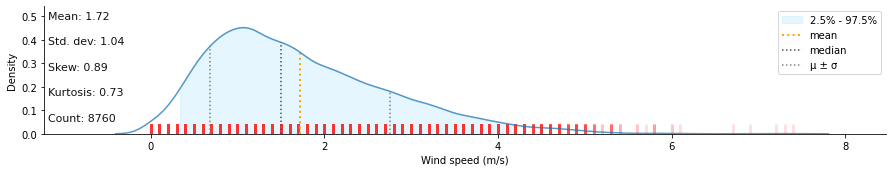

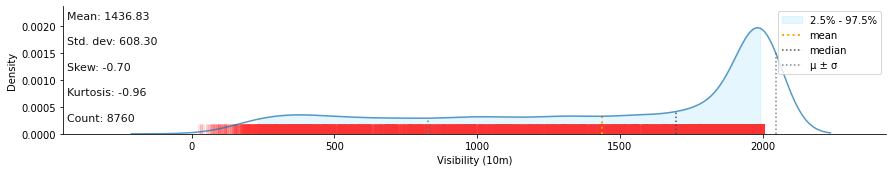

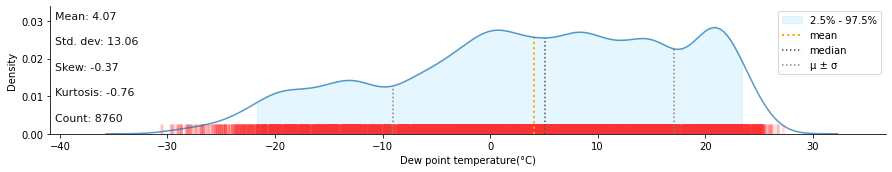

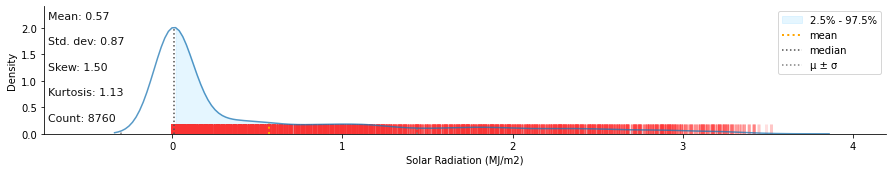

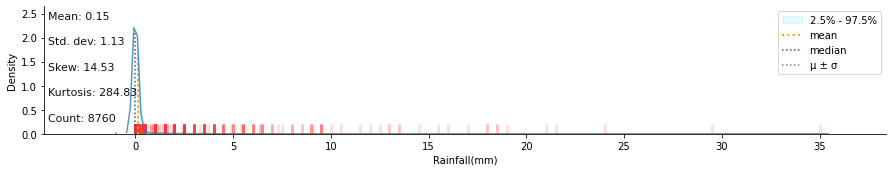

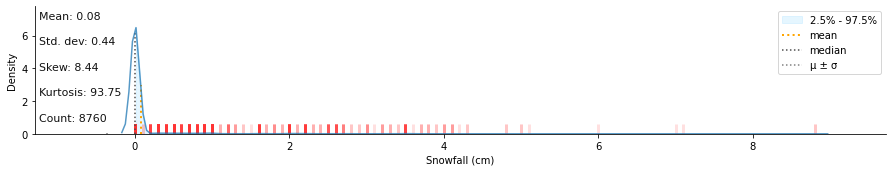

In [137]:
klib.dist_plot(data)

In [138]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [139]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [140]:
# Checking size of the data
data.shape

(8760, 14)

So , we have 8760 rows and 14 columns.

**Null Value**

In [141]:
# checking null values
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Greate!! We have 0 null values 

In [142]:
# checking info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [143]:
# data description
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [144]:
# extracting day,month, day of week and weekdays/weekend from date column

data['Date']=pd.to_datetime(data['Date'])
data['month'] = data['Date'].apply(lambda x : x.month)
data['week_day'] = data['Date'].dt.day_name()

In [145]:
data = data.drop(['Date'],axis=1)

In [146]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,week_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday


# Numeric feature

In [147]:
num_feature = data.select_dtypes(exclude='object')

In [148]:
num_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 752.9 KB


In [149]:
num_feature.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000


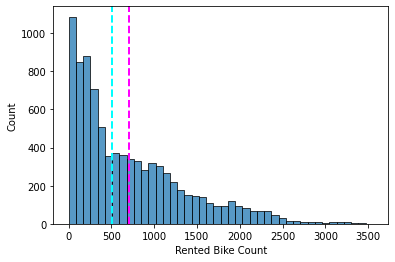

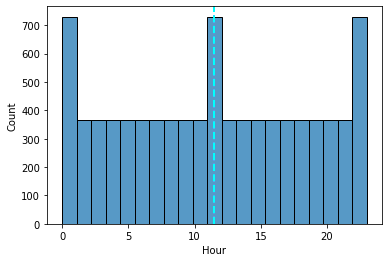

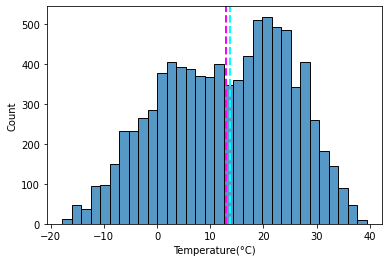

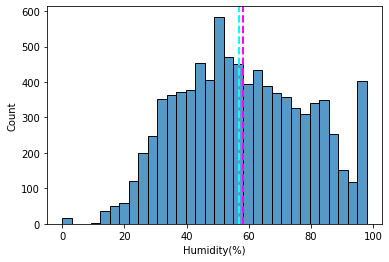

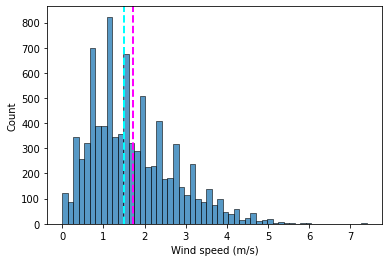

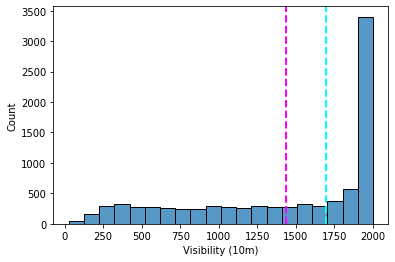

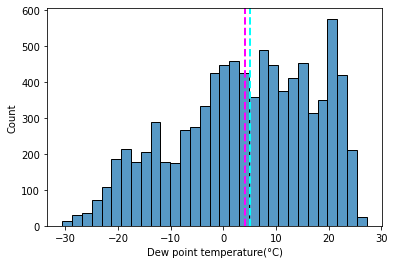

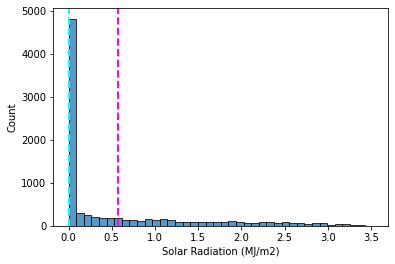

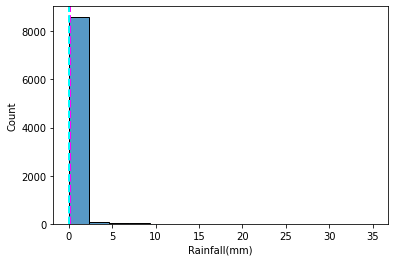

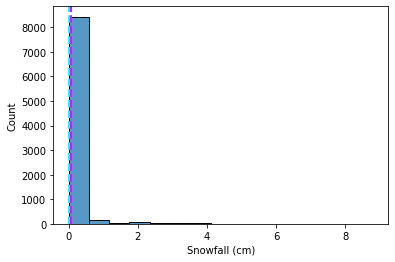

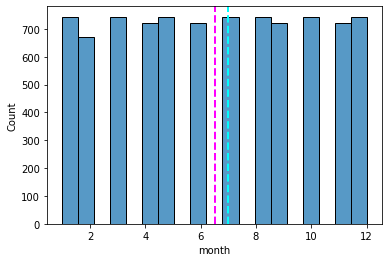

In [150]:
#plotting histogram

for col in num_feature[:]:
  sns.histplot(data[col])
  plt.axvline(data[col].mean(), color='magenta', linestyle='dashed', linewidth=2) 
  plt.axvline(data[col].median(), color='cyan', linestyle='dashed', linewidth=2)  
  plt.show()

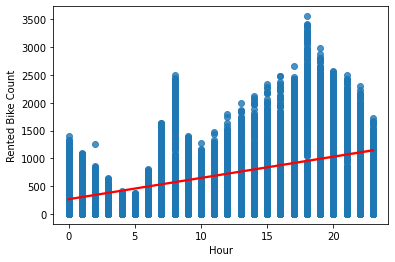

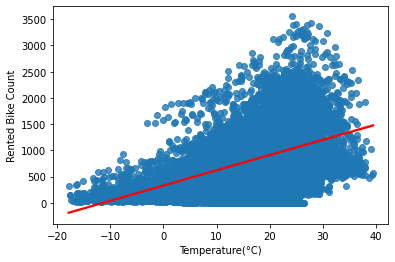

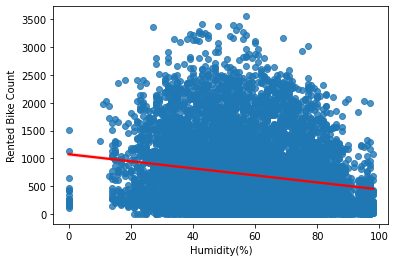

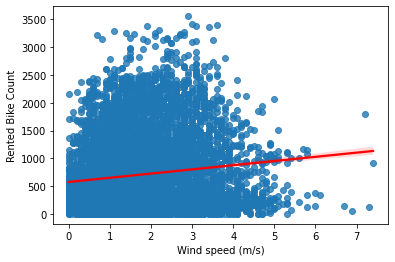

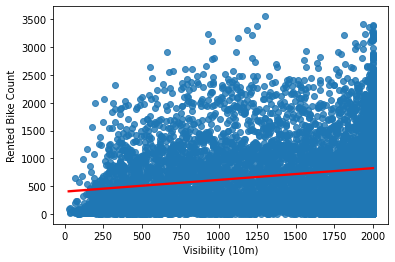

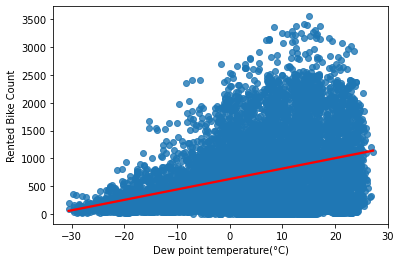

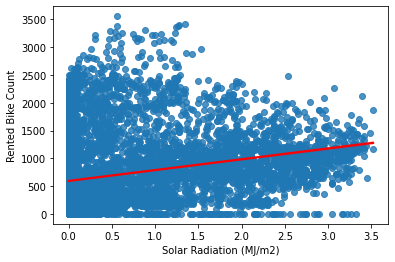

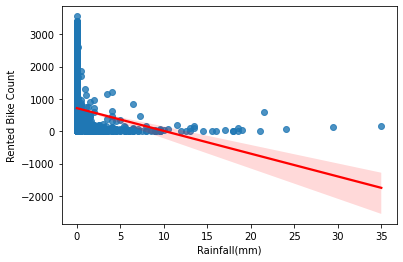

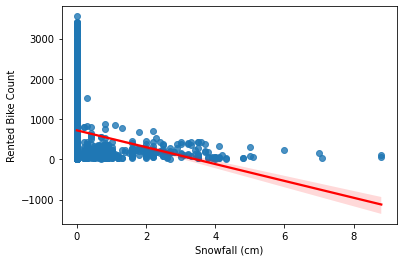

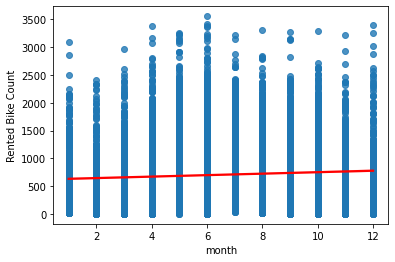

In [151]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns

for col in num_feature[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=data[col],y=data["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

# Categorical features

In [152]:
cat_features= data.select_dtypes(include='object')

In [153]:
cat_features.head()

,Seasons,Holiday,Functioning Day,week_day
0,Winter,No Holiday,Yes,Thursday
1,Winter,No Holiday,Yes,Thursday
2,Winter,No Holiday,Yes,Thursday
3,Winter,No Holiday,Yes,Thursday
4,Winter,No Holiday,Yes,Thursday


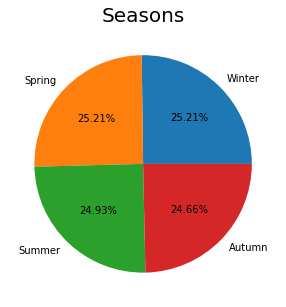

In [154]:
# Ploting pie chart for season
plt.subplots(figsize=(20,5))
plt.title("Seasons", fontsize=20)
plt.pie(data['Seasons'].value_counts(), labels = data.Seasons.unique(), autopct='%.2f%%')
plt.show()

In [155]:
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

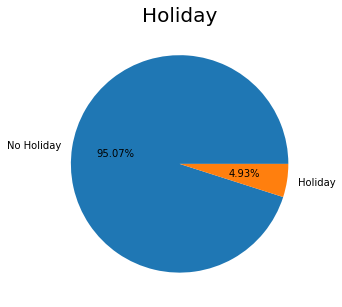

In [156]:
# Ploting pie chart for season
plt.subplots(figsize=(20,5))
plt.title("Holiday", fontsize=20)
plt.pie(data['Holiday'].value_counts(), labels = data.Holiday.unique(), autopct='%.2f%%')
plt.show()

In [157]:
#checking counts of holiday
data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

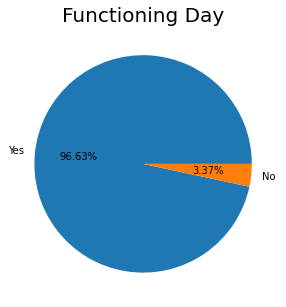

In [158]:
# Ploting pie chart for Function day
plt.subplots(figsize=(20,5))
plt.title("Functioning Day", fontsize=20)
plt.pie(data['Functioning Day'].value_counts(), labels = data['Functioning Day'].unique(), autopct='%.2f%%')
plt.show()

In [159]:
#checking counts of functioning day
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

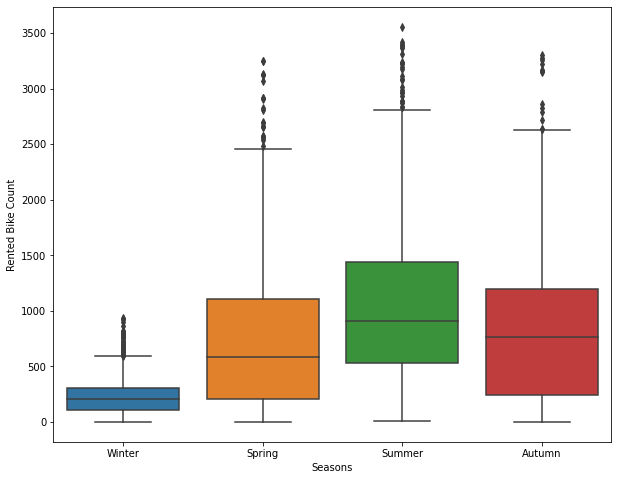

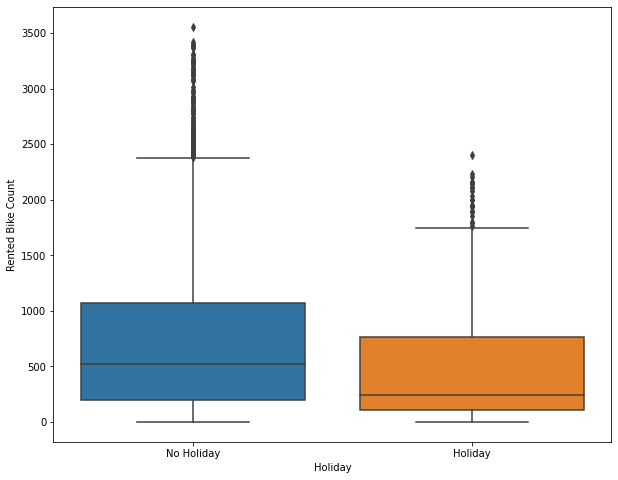

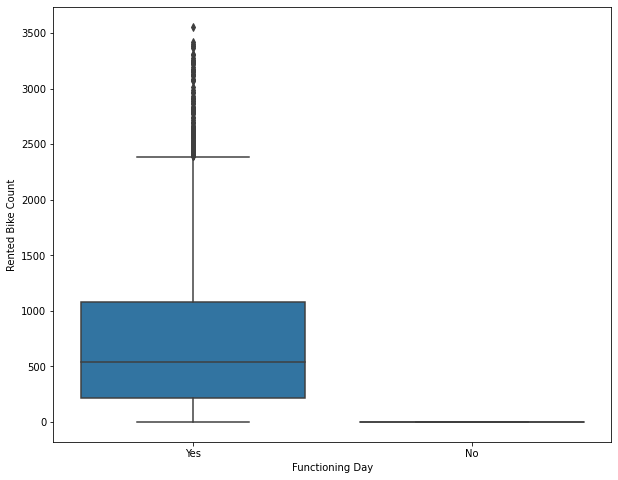

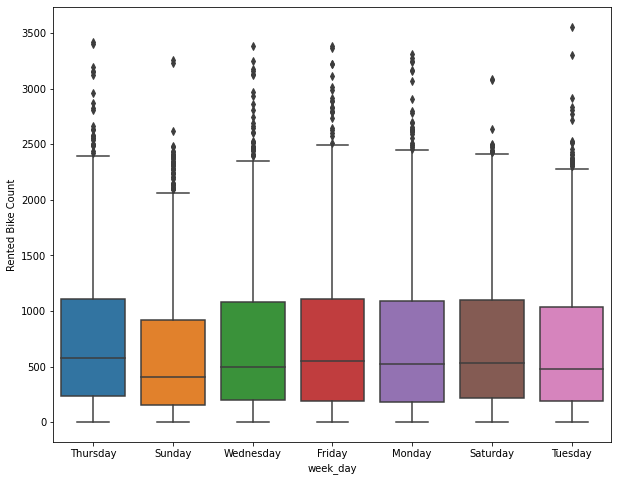

In [160]:
#ploting Box plot to visualize Categorical features
for col in cat_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=data[col],y=data["Rented Bike Count"])
  plt.show()

# observation


*   Bike reservations are lesser in Winter season compared to other season.
*   Bike reservation are more on no holidays.
*   Almost no demnad on non functioning day.


In [161]:
#checking counts of weekday
data['week_day'].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: week_day, dtype: int64

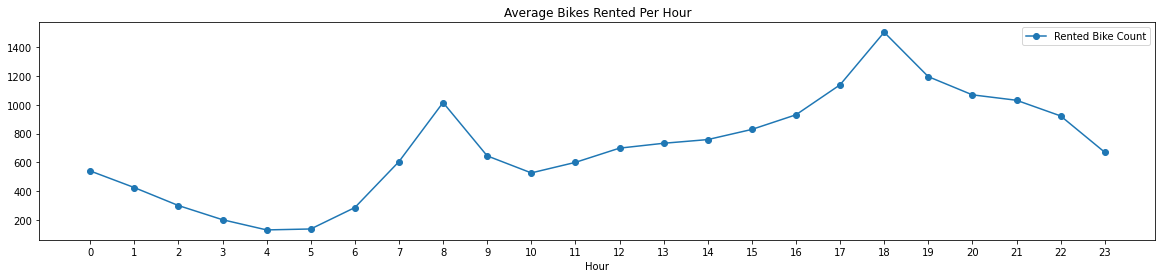

In [162]:
#ploting line graph hour and rented bike average
avg_rent_hrs = data.groupby('Hour')['Rented Bike Count'].mean()

plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hour")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist());

# Observation

*   High rise of Rented Bikes from 8:00 a.m to 6:00 p.m means people prefer rented bike during rush hour.




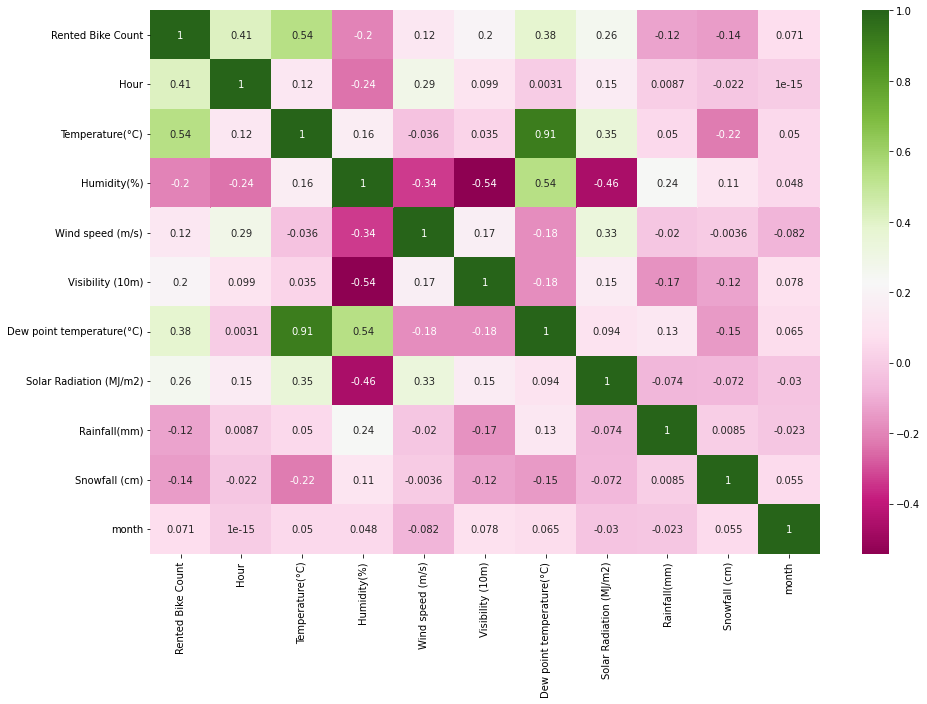

In [163]:
#checking correlation using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap='PiYG',annot=True)

In [164]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [165]:
data.drop(['week_day'],axis=1,inplace = True)

In [166]:
cat_features.drop(['week_day'],axis=1,inplace = True)

In [167]:
# calculating vif
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

,variables,VIF
0,Hour,3.956097
1,Temperature(°C),3.230202
2,Humidity(%),6.006861
3,Wind speed (m/s),4.615739
4,Visibility (10m),5.332471
5,Solar Radiation (MJ/m2),2.265399
6,Rainfall(mm),1.081093
7,Snowfall (cm),1.124563
8,month,4.577143


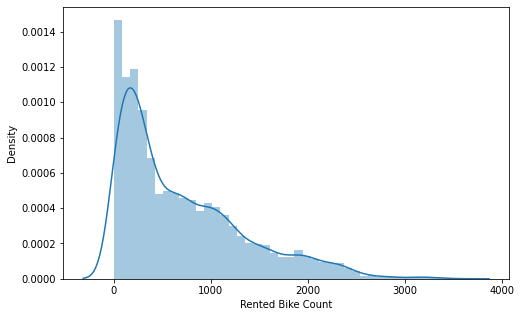

In [168]:
#visualising distribution
plt.figure(figsize=(8,5))
sns.distplot(data['Rented Bike Count'])

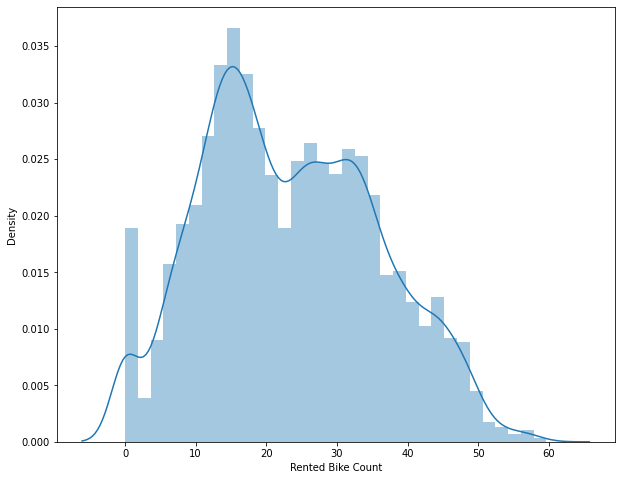

In [169]:
# square_root transformation

plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(data['Rented Bike Count']))

In [170]:
#label_encoding for categorical columns
label_encoding= pd.get_dummies(cat_features,drop_first=True)

In [171]:
label_encoding.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1


In [172]:
#concating numeric columns and dummy columns and creating final df
df= pd.concat([label_encoding,num_feature],axis=1)

In [173]:
df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month
0,0,0,1,1,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,0,0,1,1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,0,0,1,1,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,0,0,1,1,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,0,0,1,1,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


## Average bike rented per hour

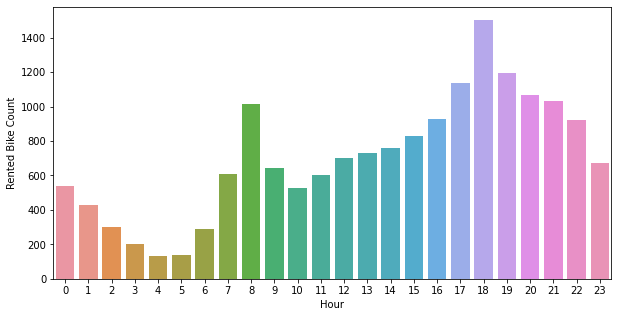

In [174]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Hour', y = 'Rented Bike Count', data = df, ci = None)

# Observation

*   We can clearly see there is high demand of Rented bike between the office hours.




## Average bike rented vs Holiday or not

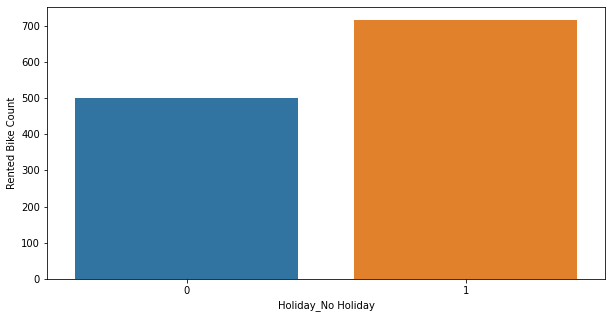

In [175]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Holiday_No Holiday', y = 'Rented Bike Count', data = df, ci = None)

# observation


*   Working days has comparatively high demand of rented bike as compared to non working day.



## Rainfall vs bike demand

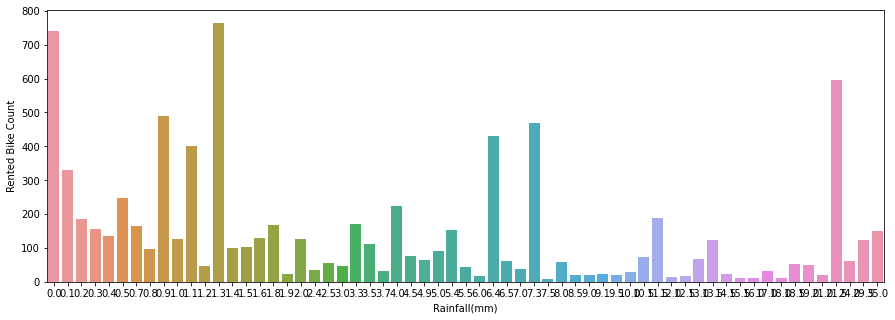

In [176]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'Rainfall(mm)', y = 'Rented Bike Count', data = df, ci = None)

# Observation 


*   Rainfall increase demand of Rented Bike Decreases.
.




## Snow fall vs bike demand

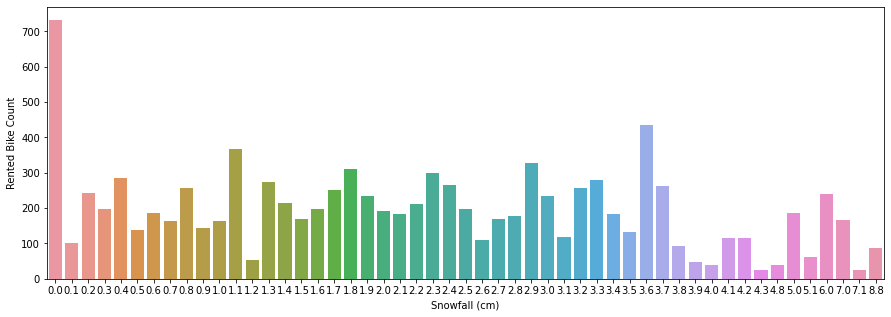

In [177]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'Snowfall (cm)', y = 'Rented Bike Count', data = df, ci = None)

## Observation

*   if Snowfall increase demand of Rented Bike Decreases.




## Bike demand on month

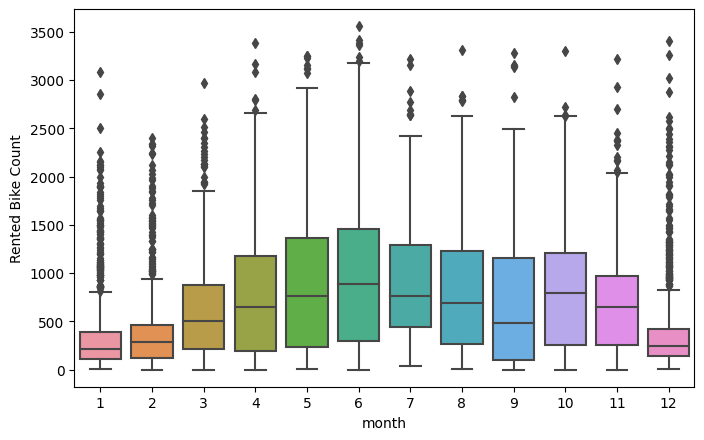

In [178]:
plt.figure(figsize=(8,5),dpi=100)
sns.boxplot(x='month',y='Rented Bike Count',data=df)
plt.show()

# observation

*   We can see that there is less demand in the month of December, january,February (winter seasons).
*   Demand of bike is maximum during May,june,july (Summer seasons).





## Creating Model

In [179]:
# Splittind data
from sklearn.model_selection import train_test_split

X=df.drop(['Rented Bike Count'],axis=1)
y=df['Rented Bike Count']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [221]:
X_train.shape,y_test.shape

((7008, 15), (1752,))

In [182]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## Linear Regresseion

In [183]:
# importing linear regresseion
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error
from math import sqrt


In [184]:
reg = LinearRegression().fit(X_train, y_train)

In [185]:
reg.score(X_train, y_train)

0.551760434459539

In [186]:
# checking cofficient and intrecept
reg.coef_,reg.intercept_

(array([ -51.65556201,  -66.7061848 , -153.66307592,   27.96152233,
         164.84029596,  189.73988443,  142.97518194, -251.46656143,
          15.87530166,    1.7068141 ,  207.45844073,  -67.90568695,
         -64.56131494,   15.53277097,   14.54895826]), 703.0933219178082)

In [187]:
#predicted value of train and test dataset
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

**Linear Regression Model Evaluation**

In [188]:
#Train Data Evaluation Metrics 
lr_train_mse  = mean_squared_error((y_train), (y_pred_train))
print("Train MSE :" , lr_train_mse)

lr_train_r2 = r2_score((y_train), (y_pred_train))
print("Train R2 :" ,lr_train_r2) 

lr_train_r2_ = 1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_r2_)

Train MSE : 186751.742792298
Train R2 : 0.551760434459539
Train Adjusted R2 :  0.5507988221192777


In [189]:
#Train Data Evaluation Metrics
lr_test_mse  = mean_squared_error((y_test), (y_pred_test))
print("Test MSE :" , lr_test_mse)

lr_test_r2 = r2_score((y_test), (y_pred_test))
print("Test R2 :" ,lr_test_r2)

lr_test_r2_ = 1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",lr_test_r2_)

Test MSE : 188129.08639676432
Test R2 : 0.5448019027511974
Test Adjusted R2 :  0.5408687394685177


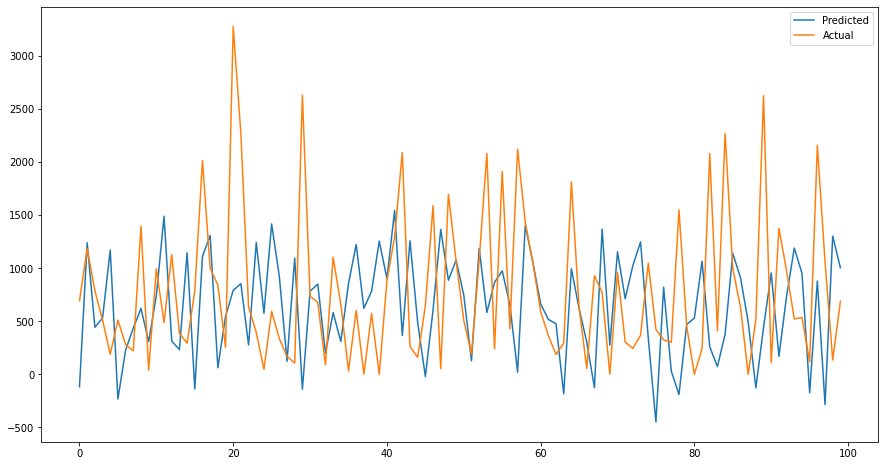

In [190]:
plt.figure(figsize=(15,8))
plt.plot((y_pred_train)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

# observation

As we can clearly see the Linear regression model does not provide us with high accuracy. It has high prediction error on the metrics we tested.

## Regularisation

## Lasso Regression

In [191]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [192]:
lasso.score(X_train, y_train)

0.5517604344578946

In [193]:
### tunning parameter
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [194]:
print('The best fit alpha value is found out to be :', lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}
The R2 score using the same alpha is : -187541.55974804208


**The best fit alpha value is found out to be : {'alpha': 0,1}**


In [195]:
y_pred_lasso_train = lasso_regressor.predict(X_train)
y_pred_lasso_test = lasso_regressor.predict(X_test)

In [196]:
lasso_train_mse  = mean_squared_error(y_train, y_pred_lasso_train)
print("Train MSE :" , lasso_train_mse)

lasso_train_r2 = r2_score(y_train, y_pred_lasso_train)
print("Train R2 :" ,lasso_train_r2)

lasso_train_r2_= 1-(1-r2_score(y_train, y_pred_lasso_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", lasso_train_r2)

Train MSE : 186752.42639229164
Train R2 : 0.5517587936900363
Train Adjusted R2 :  0.5517587936900363


In [233]:
lasso_test_mse  = mean_squared_error(y_test, y_pred_lasso_test)
print("Test MSE :" , lasso_test_mse)

lasso_test_r2 = r2_score(y_test, y_pred_lasso_test)
print("Test R2 :" ,lasso_test_r2)

lasso_test_r2_= 1-(1-r2_score(y_test, y_pred_lasso_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", lasso_test_r2_)

Test MSE : 188092.29023578
Test R2 : 0.544890934930043
Test Adjusted R2 :  0.5409585409346229


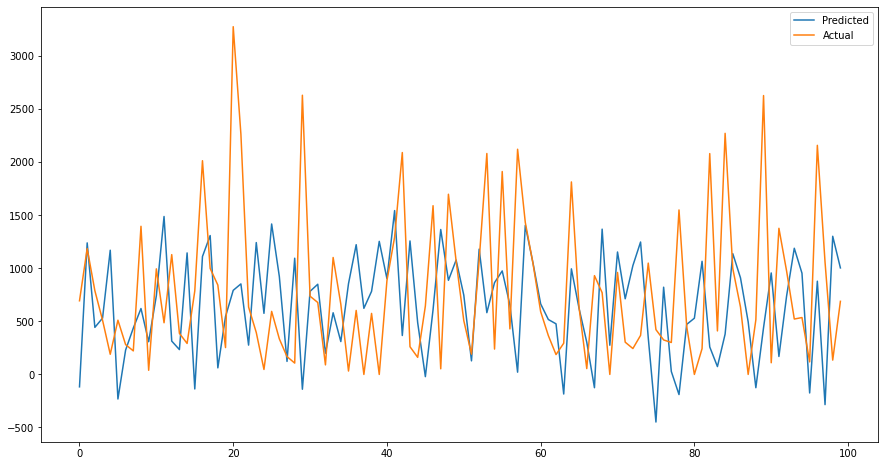

In [197]:
plt.figure(figsize=(15,8))
plt.plot((y_pred_lasso_train)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()


The Lasso regresion model doesn't improve on the Linear model either.

# Ridge regression

In [198]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55,
                                   60, 100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             scoring='neg_mean_squared_error')

In [199]:
print('The best fit alpha value is found out to be :' ,ridge_regressor.best_params_)
print('The R2 score using the same alpha is :', ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}
The R2 score using the same alpha is : -187695.34953107196


**The best fit alpha value is found out to be : {'alpha': 10}**


In [200]:
y_pred_ridge_train=ridge_regressor.predict(X_train)
y_pred_ridge_test = ridge_regressor.predict(X_test)

In [201]:
ridge_train_mse  = mean_squared_error(y_train, y_pred_ridge_train)
print("Train MSE :" , ridge_train_mse)

ridge_train_r2 = r2_score(y_train, y_pred_ridge_train)
print("Train R2 :" ,ridge_train_r2)

ridge_train_r2_= 1-(1-r2_score(y_train, y_pred_ridge_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", ridge_train_r2)

Train MSE : 186757.48599303863
Train R2 : 0.5517466496896284
Train Adjusted R2 :  0.5517466496896284


In [202]:
ridge_test_mse  = mean_squared_error(y_test, y_pred_ridge_test)
print("Test MSE :" , ridge_test_mse)

ridge_test_r2 = r2_score(y_test, y_pred_ridge_test)
print("Test R2 :" ,ridge_test_r2)

ridge_test_r2_= 1-(1-r2_score(y_test, y_pred_ridge_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", ridge_test_r2_)

Test MSE : 187993.18337940588
Test R2 : 0.5451307343853525
Test Adjusted R2 :  0.5412004123898343


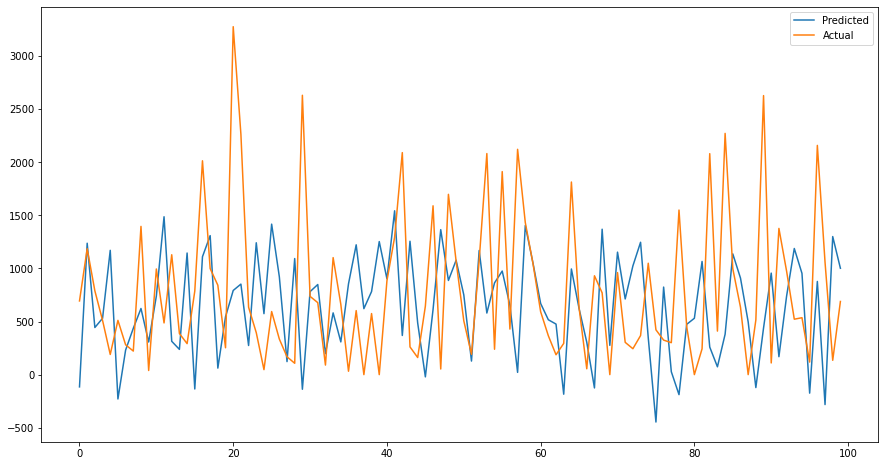

In [203]:
plt.figure(figsize=(15,8))
plt.plot((y_pred_ridge_train)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

## Decision tree

In [204]:
#decision tree implementation
from sklearn.tree import DecisionTreeRegressor

# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [8,16,22]

# Hyperparameter Grid
param_dict_dt = {'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

In [205]:
dt = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt, param_grid = param_dict_dt, cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=30; total time=   0.0s
[CV] END max_depth=4, min

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [8, 16, 22],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [206]:
print('The best fit alpha value is found out to be :' ,dt_grid.best_params_)
print('The R2 score using the same alpha is :', dt_grid.best_score_)

The best fit alpha value is found out to be : {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 30}
The R2 score using the same alpha is : 0.8141879127329664


**The best parameters for the Decision Tree Regression is {'max_depth': 10, 'min_samples_leaf': 22, 'min_samples_split': 30}**

In [207]:
y_pred_dt_train=dt_grid.predict(X_train)
y_pred_dt_test=dt_grid.predict(X_test)

**Decision Tree Regressor Model Evaluation**

In [208]:
#examining 
dt_train_mse  = mean_squared_error(y_train, y_pred_dt_train)
print("Train MSE :" , dt_train_mse)

dt_train_r2 = r2_score(y_train, y_pred_dt_train)
print("Train R2 :" ,dt_train_r2)

dt_train_r2_= 1-(1-r2_score(y_train, y_pred_dt_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", dt_train_r2_) 

Train MSE : 51687.46744872565
Train R2 : 0.8759402851791807
Train Adjusted R2 :  0.8756741387658065


In [209]:
dt_test_mse  = mean_squared_error(y_test, y_pred_dt_test)
print("Test MSE :" , dt_test_mse)

dt_test_r2 = r2_score(y_test, y_pred_dt_test)
print("Test R2 :" ,dt_test_r2)

dt_test_r2_= 1-(1-r2_score(y_test, y_pred_dt_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", dt_test_r2_)

Test MSE : 76457.3944314231
Test R2 : 0.8150032983608665
Test Adjusted R2 :  0.8134048245563809


Text(0.5, 1.0, 'Test VS Prediction')

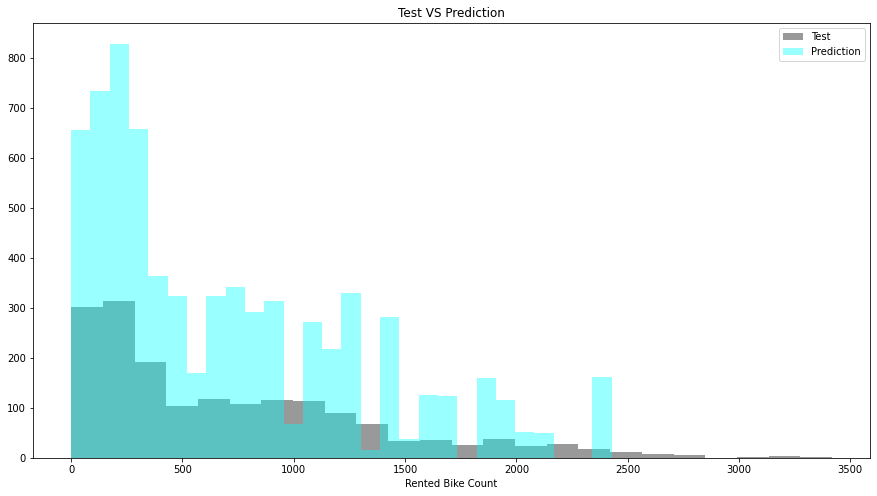

In [210]:
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_dt_train, kde=False, color="cyan", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

The decision tree with the selected hyperparameters does improve the predictions of the model considerably. It still isn't ideal but it is certainly much better than Linear models.

## Random forest

In [211]:
#random forest implementation
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred

array([ 779.13481154,  943.02283622,  801.09160595, ...,  921.93647186,
       1024.98378567,  665.49794872])

In [212]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [213]:
# Fitting Random Forest Regression to the dataset
forest_reg = RandomForestRegressor(n_estimators = 40, n_jobs = -4)

In [214]:
# Fit the object to train dataset
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=40, n_jobs=-4)

In [215]:
y_pred_forest_train = forest_reg.predict(X_train)
y_pred_forest_test = forest_reg.predict(X_test)

In [216]:
#examining metrics 
forest_train_mse  = mean_squared_error(y_train, y_pred_forest_train)
print("Train MSE :" , forest_train_mse)

forest_train_r2 = r2_score(y_train, y_pred_forest_train)
print("Train R2 :" ,forest_train_r2)

forest_train_r2_= 1-(1-r2_score((y_train), (y_pred_forest_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",forest_train_r2_)

Train MSE : 7552.061674425657
Train R2 : 0.9818736211332485
Train Adjusted R2 :  0.9818347344508971


In [217]:
forest_test_mse  = mean_squared_error(y_test, y_pred_forest_test)
print("Test MSE :" , forest_test_mse)

forest_test_r2 = r2_score(y_test, y_pred_forest_test)
print("Test R2 :" ,forest_test_r2)

forest_test_r2_= 1-(1-r2_score((y_test), (y_pred_forest_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", forest_test_r2_)

Test MSE : 54497.14480629281
Test R2 : 0.8681384303913592
Test Adjusted R2 :  0.8669990735111002


Text(0.5, 1.0, 'Test VS Prediction')

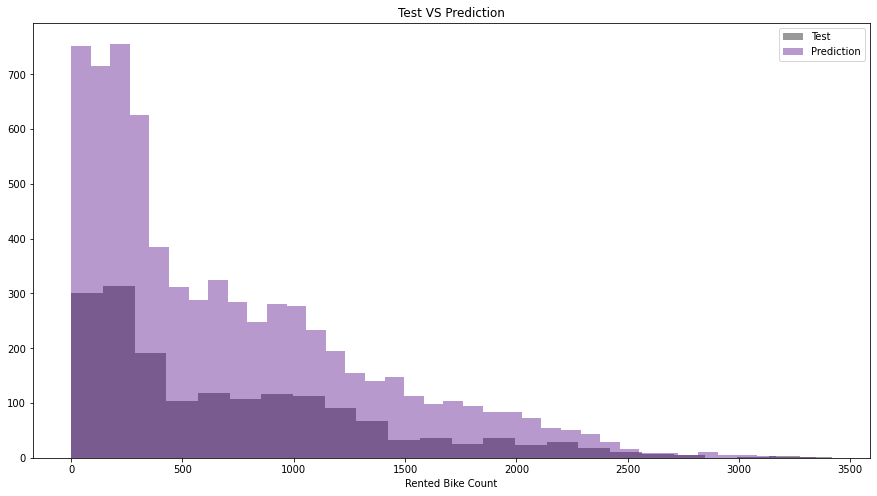

In [218]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_forest_train, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

## XGBoost Regressor

In [219]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [220]:
xgb_model = xgb.XGBRegressor(random_state=0, objective='reg:squarederror')
# set the hyperparameter for XGBRegressor
param_tuning = {'learning_rate': [0.1, 0.2, 0.3],'max_depth': [5, 8, 10],'min_samples_' : [2,4,6],'n_estimators' : [100,200,300]}

xgb_model = GridSearchCV(xgb_model, param_grid = param_tuning,scoring = 'r2', cv=5,verbose=1,)
xgb_model.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=XGBRegressor(objective='reg:squarederror'),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [5, 8, 10], 'min_samples_': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=1)

**The best parameters for the XGBoost which we already tested before to save time when running it again.**

{'learning_rate': 0.2, 'max_depth': 8, 'minsamples': 4, 'n_estimators': 200}

In [223]:
xgb_model = xgb.XGBRegressor()
grid_values = {'n_estimators' : [200], 'max_depth': [8],'min_samples_' : [4],'learning_rate' : [0.2]}
xgb_model = GridSearchCV(estimator = xgb_model, param_grid = grid_values, scoring = 'r2', cv=3,verbose=1,)

In [224]:
xgb_model.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[08:55:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.2], 'max_depth': [8],
                         'min_samples_': [4], 'n_estimators': [200]},
             scoring='r2', verbose=1)

In [225]:
print('The R2 score using the same alpha is :', xgb_model.best_score_)

The R2 score using the same alpha is : 0.8766757910863138


In [226]:
xgb_model.best_params_

{'learning_rate': 0.2, 'max_depth': 8, 'min_samples_': 4, 'n_estimators': 200}

In [227]:
y_pred_xgb_train=xgb_model.predict(X_train)
y_pred_xgb_test=xgb_model.predict(X_test)

**XGBoost Regressor Model Evaluation**

In [228]:
xgb_train_mse  = mean_squared_error(y_train, y_pred_xgb_train)
print("Train MSE :" , xgb_train_mse)

xgb_train_r2 = r2_score(y_train, y_pred_xgb_train)
print("Train R2 :" ,xgb_train_r2)

xgb_train_r2_= 1-(1-r2_score((y_train), (y_pred_xgb_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", xgb_train_r2_)

Train MSE : 816.782635338466
Train R2 : 0.9980395669238156
Train Adjusted R2 :  0.9980353611892414


In [229]:
xgb_test_mse  = mean_squared_error(y_test, y_pred_xgb_test)
print("Test MSE :" , xgb_test_mse)

xgb_test_r2 = r2_score(y_test, y_pred_xgb_test)
print("Test R2 :" ,xgb_test_r2)

xgb_test_r2_= 1-(1-r2_score((y_test), (y_pred_xgb_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", xgb_test_r2_)

Test MSE : 49604.231492306724
Test R2 : 0.8799773484087068
Test Adjusted R2 :  0.8789402863269848


Text(0.5, 1.0, 'Test VS Prediction')

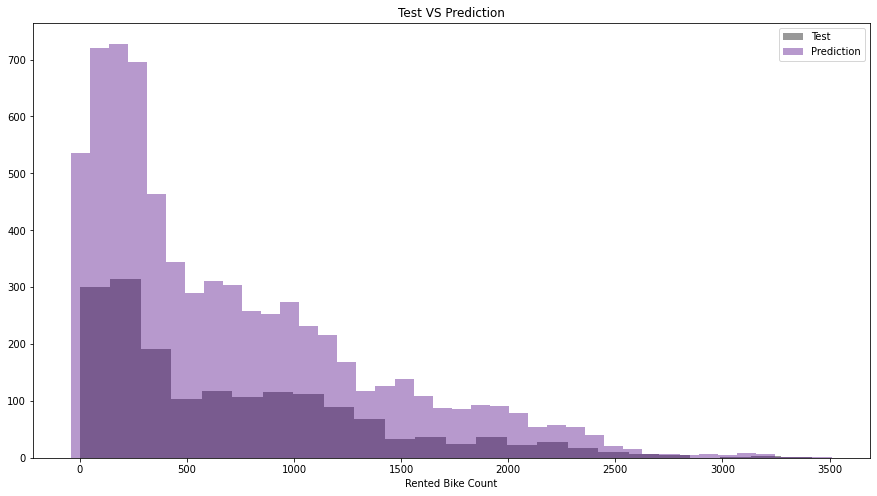

In [230]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_xgb_train, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

##Evaluating the models

In [231]:
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','Ramdom Forest' 'XGBoost Regressor']
train_mse= [lr_train_mse, lasso_train_mse, ridge_train_mse, dt_train_mse, forest_train_mse, xgb_train_mse]
train_r2= [lr_train_r2, lasso_train_r2, ridge_train_r2, dt_train_r2, forest_train_r2, xgb_train_r2]
train_adjusted_r2= [lr_train_r2_, lasso_train_r2_, ridge_train_r2_, dt_train_r2_, forest_train_r2_, xgb_train_r2_]

In [234]:
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','Ramdom Forest', 'XGBoost Regressor']
test_mse= [lr_test_mse, lasso_test_mse, ridge_test_mse, dt_test_mse, forest_test_mse, xgb_test_mse]
test_r2= [lr_test_r2, lasso_test_r2, ridge_test_r2, dt_test_r2, forest_test_r2, xgb_test_r2]
test_adjusted_r2= [lr_test_r2_, lasso_test_r2_, ridge_test_r2_, dt_test_r2_, forest_test_r2_, xgb_test_r2_]

In [235]:
model_comparison = pd.DataFrame({'Model Name': models,
                          'Train MSE': train_mse,'Test MSE': test_mse,
                          'Train R^2': train_r2, 'Test R^2': test_r2,
                          'Train Adjusted R^2': train_adjusted_r2, 'Test Adjusted R^2': test_adjusted_r2})
model_comparison

,Model Name,Train MSE,Test MSE,Train R^2,Test R^2,Train Adjusted R^2,Test Adjusted R^2
0,Linear Regression,186751.742792,188129.086397,0.551760,0.544802,0.550799,0.540869
1,Lasso Regression,186752.426392,188092.290236,0.551759,0.544891,0.550797,0.540959
2,Ridge Regression,186757.485993,187993.183379,0.551747,0.545131,0.550785,0.541200
3,DecisionTree Regressor,51687.467449,76457.394431,0.875940,0.815003,0.875674,0.813405
4,Ramdom Forest,7552.061674,54497.144806,0.981874,0.868138,0.981835,0.866999
5,XGBoost Regressor,816.782635,49604.231492,0.998040,0.879977,0.998035,0.878940


## Conclusion


*   In holiday or non-working days there is demands in rented bikes.
*   here is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

*   People prefered more rented bikes in the morning than the evening.
*   When the rainfall was less, people have booked more bikes except some few cases.


*   Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.


*   We use either random forest or Xgboost for prediction.





